[[0, 6, 24], [1, 243, 111], [2, 88, 167], [3, 217, 141], [4, 179, 87], [5, 103, 138], [6, 46, 170], [7, 322, 137], [8, 326, 38], [9, 12, 20]]

packed blocks: [[7, 479.0, 291.5, 322, 137], [3, 813.5, 297.5, 217, 141], [1, 221.5, 274.5, 243, 111], [4, 510.5, 201.5, 179, 87], [2, 1052.0, 276.5, 88, 167], [5, 280.5, 400.0, 103, 138], [8, 712.0, 208.0, 326, 38], [6, 162.0, 214.0, 46, 170], [9, 1015.0, 453.0, 12, 20], [0, 494.0, 501.0, 6, 24]]

adjusted blocks: [[7, 479.0, 291.5, 801.0, 428.5], [3, 813.5, 297.5, 1030.5, 438.5], [1, 221.5, 274.5, 464.5, 385.5], [4, 510.5, 201.5, 689.5, 288.5], [2, 1052.0, 276.5, 1140.0, 443.5], [5, 280.5, 400.0, 383.5, 538.0], [8, 712.0, 208.0, 1038.0, 246.0], [6, 162.0, 214.0, 208.0, 384.0], [9, 1015.0, 453.0, 1027.0, 473.0], [0, 494.0, 501.0, 500.0, 525.0]]

shape: [479.0, 291.5, 801.0, 428.5]
shape: [813.5, 297.5, 1030.5, 438.5]
shape: [221.5, 274.5, 464.5, 385.5]
shape: [510.5, 201.5, 689.5, 288.5]
shape: [1052.0, 276.5, 1140.0, 443.5]
shape: [280.5, 400.

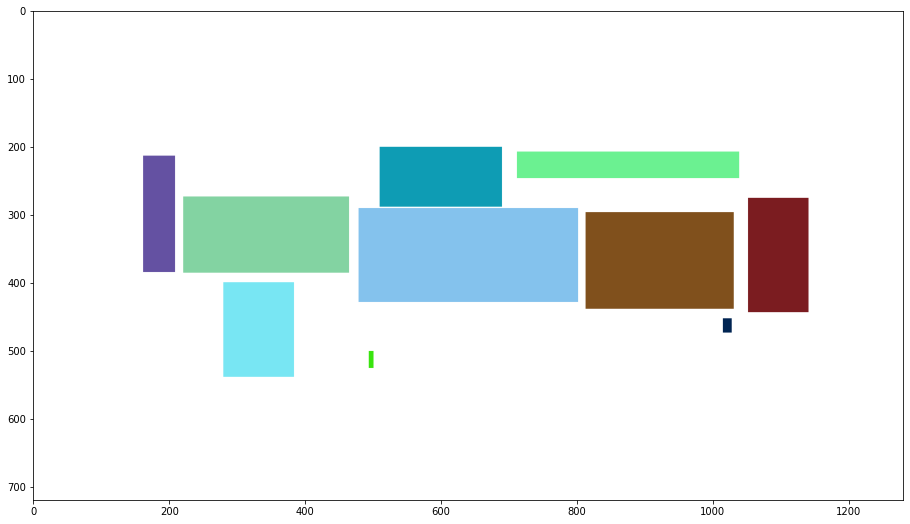

In [4]:
import math
import random
from cloud_packer import CloudPacker
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

IMAGE_WIDTH = 1280
IMAGE_HEIGHT = 720
MARGIN = 10

def generate_random_windows(number_windows = 10):
   windows = []

   for n in range(number_windows):
      windows.append([n, random.randint(0, math.floor(IMAGE_WIDTH / 3)), random.randint(0, math.floor(IMAGE_HEIGHT / 4))])

   return windows

def cloud_packer_test():
   blocks = generate_random_windows()
   print(f"{blocks}\n")
   packer = CloudPacker()
   blocks = packer.fit(blocks, view_width=IMAGE_WIDTH, view_height=IMAGE_HEIGHT, margin=MARGIN)
   print(f"packed blocks: {blocks}\n")

   image = Image.new("RGB", (IMAGE_WIDTH, IMAGE_HEIGHT), color="White")
   canvas = ImageDraw.Draw(image)

   # Adjust the blocks to be properly displaced on matplotlib
   blocks = [[window, x, y, x + w, y + h] for window, x, y, w, h in blocks]
   print(f"adjusted blocks: {blocks}\n")

   for shape in blocks:
      color = "#" + ''.join([random.choice('ABCDEF0123456789') for _ in range(6)])
      print(f"shape: {shape[1:]}")
      canvas.rectangle(shape[1:], fill=color)

   plt.figure(figsize=(16, 9))
   plt.imshow(image)
   plt.show()

cloud_packer_test()
